# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment:MANIKANTA BHAVANAM(1002039918),MEGHANA RAMIDI(1002036880)

Student Name and ID of the remaining members: SWATHI SHANAM(1002023662)

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

In [1]:
#import Libraries

import numpy as np #Helps for Multidimensional Array and Matrices
import pandas as pd #Helps with Data Analysis
import seaborn as sns #Helps with Data Visualization
import sklearn
import matplotlib
import matplotlib.pyplot as plt

from pandas import Series
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import neighbors
from sklearn import datasets
from matplotlib.colors import ListedColormap
import sklearn.cluster as cluster
from sklearn.tree import DecisionTreeClassifier 

%matplotlib notebook
%matplotlib inline

In [2]:
import pandas as pd
d = pd.read_csv('pima-indians-diabetes.csv',encoding='latin1') #Assigning the titanic.csv file to 'data' dataframe.
d #printing the data
output = 'class' #output variable
d.head() 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
d.isnull().sum() #also check the missed values.

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [4]:
y = d[output]
X = d.drop(output,axis = 1)

In [5]:
m = DecisionTreeClassifier(max_depth=10,random_state=2022) #can play with the max_depth 
tree_= m.fit(X,y)
importance = m.feature_importances_ #taking the important features using decision tree
i = np.argsort(importance)[::-1] #sorting into order
top_3_cols=X.columns[i[:3]] #top 3 varibales
print(top_3_cols)

Index(['Plas', 'mass', 'pedi'], dtype='object')


In [6]:
new_d=d[['Plas','pedi','mass']] #assigning subset of the table to the new_data data frame.

3.) Finding the Best K for the selected attributes.

    Clusters            WSS
0          1  831825.364942
1          2  327271.136975
2          3  197603.587736
3          4  146195.331504
4          5  110798.169885
5          6   86679.452686
6          7   75874.287332
7          8   66925.677734
8          9   59252.869540
9         10   53939.904790
10        11   49821.060393


score of Silhoutte3 is 0.4584483014865275
score of Silhoutte4 is 0.4141170404430481
score of Silhoutte5 is 0.426089648880696
score of Silhoutte6 is 0.3983353718937314
score of Silhoutte7 is 0.3747936789443133
score of Silhoutte8 is 0.3414564564120705
score of Silhoutte9 is 0.35143781682407704
score of Silhoutte10 is 0.3641031143061724
score of Silhoutte11 is 0.34767089680578206
score of Silhoutte12 is 0.34634724886855134


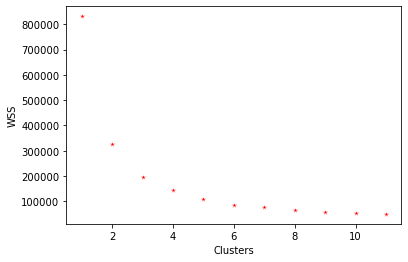

In [7]:
#Finding best k using 3 attributes using elbow method:
Best_dataK= new_d #creating a temporary variable 'Best_dataK'for calculating the best K.
M=range(1,12) #cluster range form 1 to 12 among which the best K will be find out.
wss=[]
for k in M: #iterating from 1 to 12 times.
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++") #for every k value from 1 to 12 it will create clusters
    kmeans=kmeans.fit(Best_dataK)
    wss_iter=kmeans.inertia_ #for each k clusters it finds the plot of it.
    wss.append(wss_iter) # appending all k clusters one after the other.
   
AllCenters=pd.DataFrame({'Clusters' : M,'WSS' : wss}) #creating AllCenters dataframe with cluster count and plot value.
print(AllCenters)
print("\n")
sns.scatterplot(x='Clusters',y='WSS', data=AllCenters, marker ='*', color = 'red') #plotting it in the graph.

# We can also find the best k using Silhouette Method and we are verifing our elbow method using this method.
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(Best_dataK).labels_
    print("score of Silhoutte"+str(i)+" is "+str(metrics.silhouette_score(Best_dataK,labels,metric="euclidean",sample_size=1000,random_state=200)))

In [8]:
X=new_d.loc[:, new_d.columns != 'class']
Y=d['class']

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2022) #we split the training part and testing part
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.2)# seperating training and validation set

5.)Testing the classifier with three different numbers for neighbors:

In [10]:
from sklearn.neighbors import KNeighborsClassifier
k_Val_1=3
classifier1 = KNeighborsClassifier(n_neighbors=k_Val_1, metric='euclidean') 
classifier1.fit(X_train, Y_train) #training the mode
Y_pred1 = classifier1.predict(X_test)  #This predicts the test data values
print(Y_pred1)
Accuracy1=classifier1.score(X_test,Y_test) #To find the Accuracy Percentage.
Accuracy1 = "{0:.0f}%".format(Accuracy1 * 100)
print("\n\nAccuracy Percentage for 3 neighbours is :",Accuracy1) 

k_Val_2=6
classifier1 = KNeighborsClassifier(n_neighbors=k_Val_2, metric='euclidean') 
classifier1.fit(X_train, Y_train) #training the mode
Y_pred2 = classifier1.predict(X_test) #predicts the test data values
print(Y_pred2)
Accuracy2=classifier1.score(X_test,Y_test)# find the Accuracy Percentage.
Accuracy2 = "{0:.0f}%".format(Accuracy2 * 100)
print("\n\nAccuracy Percentage for 6 neighbours is : ",Accuracy2) 

k_Val_3=23
classifier1 = KNeighborsClassifier(n_neighbors=k_Val_3, metric='euclidean') 
classifier1.fit(X_train, Y_train) #training the mode
Y_pred3 = classifier1.predict(X_test) #This predicts the test data values
print(Y_pred3)
Accuracy3=classifier1.score(X_test,Y_test) #To find the Accuracy Percentage.
print(Accuracy3)
Accuracy3 = "{0:.0f}%".format(Accuracy3 * 100)
print("\n\nAccuracy Percentage for 23 neighbours is:",Accuracy3)

[0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1]


Accuracy Percentage for 3 neighbours is : 72%
[0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1]


Accuracy Percentage for 6 neighbours is :  73%
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0

Confusion Matrices for three types of neighbours

confusion matrix for k=3
 [[89 19]
 [24 22]]


confusion matrix1 (Represented as Heat Map):

 AxesSubplot(0.125,0.125;0.62x0.755)


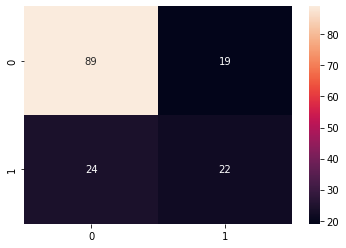

In [11]:
cf=confusion_matrix(Y_test, Y_pred1)
print("confusion matrix for k=3\n",confusion_matrix(Y_test, Y_pred1))
print("\n\nconfusion matrix1 (Represented as Heat Map):\n\n",sns.heatmap(cf, annot=True,fmt='d'))

confusion matrix for k=6
 [[97 11]
 [31 15]]


confusion matrix2 (Represented as Heat Map):

 AxesSubplot(0.125,0.125;0.62x0.755)


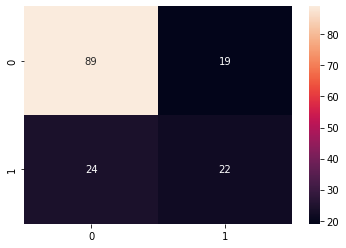

In [12]:
cf=confusion_matrix(Y_test, Y_pred1)
print("confusion matrix for k=6\n",confusion_matrix(Y_test, Y_pred2))
print("\n\nconfusion matrix2 (Represented as Heat Map):\n\n",sns.heatmap(cf, annot=True,fmt='d'))

confusion matrix for k=23
 [[98 10]
 [23 23]]


confusion matrix3 (Represented as Heat Map):

 AxesSubplot(0.125,0.125;0.62x0.755)


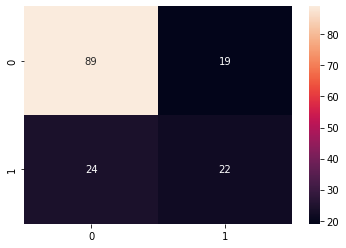

In [13]:
cf=confusion_matrix(Y_test, Y_pred1)
print("confusion matrix for k=23\n",confusion_matrix(Y_test, Y_pred3))
print("\n\nconfusion matrix3 (Represented as Heat Map):\n\n",sns.heatmap(cf, annot=True,fmt='d'))

Classification Reports for the above scenarios:

In [14]:
print("\n\nclassification report for k=3\n\n",classification_report(Y_test, Y_pred1))



classification report for k=3

               precision    recall  f1-score   support

           0       0.79      0.82      0.81       108
           1       0.54      0.48      0.51        46

    accuracy                           0.72       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.71      0.72      0.72       154



In [15]:
print("\n\nclassification report for k=6\n\n",classification_report(Y_test, Y_pred2))




classification report for k=6

               precision    recall  f1-score   support

           0       0.76      0.90      0.82       108
           1       0.58      0.33      0.42        46

    accuracy                           0.73       154
   macro avg       0.67      0.61      0.62       154
weighted avg       0.70      0.73      0.70       154



In [16]:
print("\n\nclassification report for k=23\n\n",classification_report(Y_test, Y_pred3))



classification report for k=23

               precision    recall  f1-score   support

           0       0.81      0.91      0.86       108
           1       0.70      0.50      0.58        46

    accuracy                           0.79       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.78      0.79      0.77       154



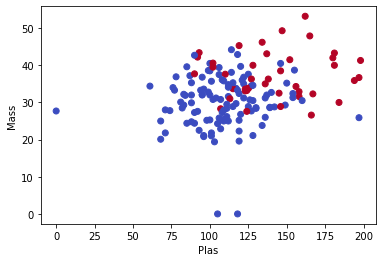

In [17]:
plt.xlabel("Plas")
plt.ylabel("Mass")
plt.scatter(X_test['Plas'], X_test['mass'], c=Y_pred1,cmap='coolwarm')

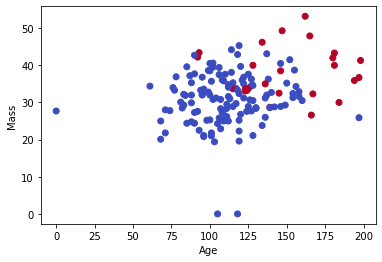

In [18]:
plt.xlabel("Age")
plt.ylabel("Mass")
plt.scatter(X_test['Plas'], X_test['mass'], c=Y_pred2,cmap='coolwarm')

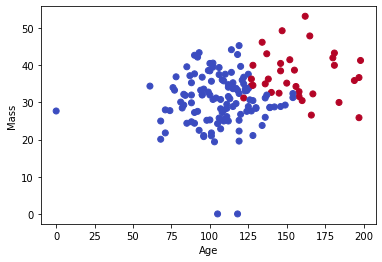

In [19]:
plt.xlabel("Age")
plt.ylabel("Mass")
plt.scatter(X_test['Plas'], X_test['mass'], c=Y_pred3,cmap='coolwarm')

Text(0, 0.5, 'Accuracy')

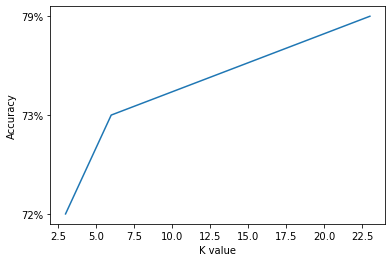

In [20]:
# classifier for all three different numbers
#x is the k values considered
#y is the accuracy for each considered k values(approximately)
x = (k_Val_1,k_Val_2,k_Val_3)
y = [Accuracy1, Accuracy2 , Accuracy3]

plt.plot(x, y)
plt.xlabel('K value')
plt.ylabel('Accuracy')